<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<b> Questions </b>
<li> Can we do better by including/excluding some features from the features dataframe? 
<li> What would happen if we applied k-means clustering to the full dataset instead of the reduced dataset?
<li> What would happen if we applied k-means clustering to a UMAP-reduced dataset? 
<li> When does k-means clustering work well? When does it fail? Look at the different clustering methods and the kinds of data they work on. 
</div>

In [1]:
# Relevant imports
import numpy as np

%matplotlib inline
import pandas as pd

# dir handling
import os

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read structural features of excitatory cells
feat_df = pd.read_feather('../workshop1/data/dfct_e.feather')

In [3]:
from sklearn.decomposition import PCA

In [4]:
# sample list of features that are retained. We are reducing correlated features...
# ... but we encourage you to play around with what features to include
reduced_for_kmeans = feat_df[[
    "tip_len_dist_dendrite_p50",
    "tip_tort_dendrite_p50",
    "num_syn_dendrite",
    "num_syn_soma",
    "path_length_dendrite",
    "radial_extent_dendrite",
    "syn_dist_distribution_dendrite_p50",
    "syn_size_distribution_soma_p50",
    "syn_size_distribution_dendrite_p50",
    "syn_size_distribution_dendrite_dyn_range",
    "syn_depth_dist_p5",
    "syn_depth_dist_p95",
    "syn_depth_extent",
    "max_density",
    "radius_dist",
    "syn_count_pca0",
    "syn_count_pca1",
    "syn_count_pca2",
    "syn_count_pca3",
    "syn_count_pca4",
    "syn_count_pca5",
    "branch_svd0",
    "branch_svd1",
    "branch_svd2",
    "ego_count_pca0",
    "ego_count_pca1",
    "ego_count_pca2",
    "ego_count_pca3",
    "ego_count_pca4",
] ]

In [5]:
# z-score data
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
reduced_for_kmeans_transformed = pd.DataFrame(std_scaler.fit_transform(reduced_for_kmeans))

#reduced_for_kmeans.apply(zscore)
PCA_model = PCA(n_components=3)
reduced_data = PCA_model.fit_transform(reduced_for_kmeans_transformed)

In [6]:
# We will append this to the original dataframe as the PC0, PC1 components
feat_df['pc0'] = reduced_data[:,0]
feat_df['pc1'] = reduced_data[:,1]
feat_df['pc2'] = reduced_data[:,2]

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<li> What would happen if we applied k-means clustering to the full dataset instead of the PCA-reduced dataset?
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<li> What would happen if we applied k-means clustering to a UMAP-reduced dataset? 
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<li> Instead of using ARI, can we use a method to evaluate unsupervised clustering without labels? Let's try it with the synthetic data
</div>

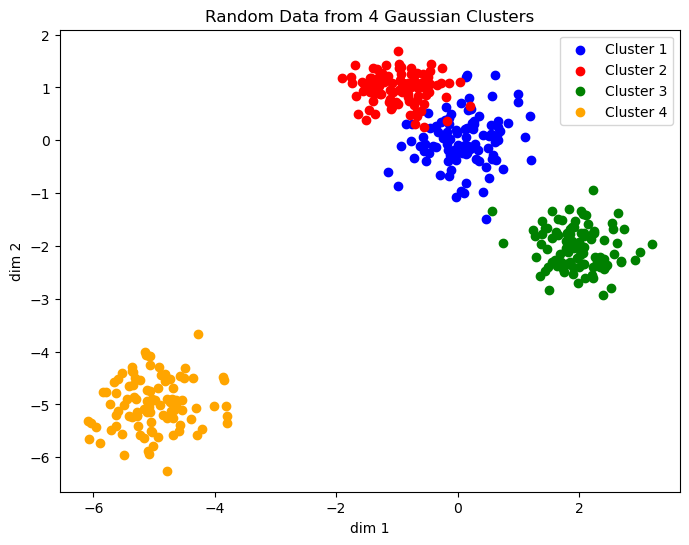

In [14]:
# Set the random seed for reproducibility
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

# Number of samples in each cluster
n_samples = 100

# Generate cluster 1 data 
cluster_1_mean = [0, 0]  # Mean of cluster 1
cluster_1_cov = [[0.25, 0], [0, 0.25]]  # Covariance matrix of cluster 1
cluster_1_data = np.random.multivariate_normal(cluster_1_mean, cluster_1_cov, n_samples)

# Generate cluster 2 data
cluster_2_mean = [-1, 1]  # Mean of cluster 2
cluster_2_cov = [[0.2, 0], [0, 0.1]]  # Covariance matrix of cluster 2
cluster_2_data = np.random.multivariate_normal(cluster_2_mean, cluster_2_cov, n_samples)

# Generate cluster 3 data
cluster_3_mean = [2, -2]  # Mean of cluster 3
cluster_3_cov = [[0.2, 0], [0, 0.2]]  # Covariance matrix of cluster 3
cluster_3_data = np.random.multivariate_normal(cluster_3_mean, cluster_3_cov, n_samples)

# Generate cluster 4 data
cluster_4_mean = [-5, -5]  # Mean of cluster 4
cluster_4_cov = [[0.3, 0], [0, 0.25]]  # Covariance matrix of cluster 4
cluster_4_data = np.random.multivariate_normal(cluster_4_mean, cluster_4_cov, n_samples)


# Combine data from all clusters
X = np.concatenate((cluster_1_data, cluster_2_data, cluster_3_data, cluster_4_data))

# Create labels for each cluster
labels = np.concatenate((
    np.zeros(n_samples),  # Cluster 1 labeled as 0
    np.ones(n_samples),   # Cluster 2 labeled as 1
    np.full(n_samples, 2),  # Cluster 3 labeled as 2
    np.full(n_samples, 3),  # Cluster 4 labeled as 3
))

# Define colors for each cluster
colors = ['b', 'r', 'g', 'orange', 'purple']

# Plot the generated data with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title('Random Data from 4 Gaussian Clusters')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
# usage : sklearn.metrics.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)

In [18]:
range_n_clusters = np.arange(2,10)
from sklearn.cluster import KMeans
#range_n_clusters = ?
for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto")
     # replace X with the input to Kmeans
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3657443134404754
For n_clusters = 3 The average silhouette_score is : 0.4008637258627934
For n_clusters = 4 The average silhouette_score is : 0.3871750396433039
For n_clusters = 5 The average silhouette_score is : 0.3593950423455945
For n_clusters = 6 The average silhouette_score is : 0.34257232127817205
For n_clusters = 7 The average silhouette_score is : 0.3529840013655054
For n_clusters = 8 The average silhouette_score is : 0.3463470775151928
For n_clusters = 9 The average silhouette_score is : 0.3323874289134459


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #DFF0D8; ">
<li> What happens when you decrease the distance between means in the synthetic data, and increase the variance? 
</div>

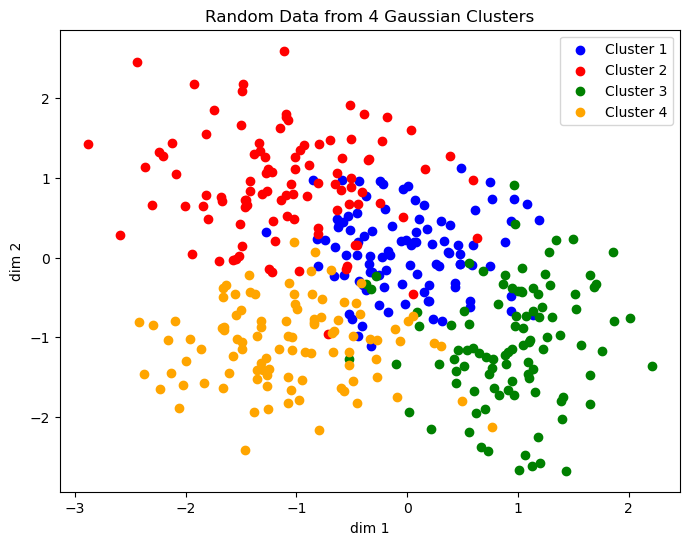

In [17]:
# Set the random seed for reproducibility
np.random.seed(0)

# Number of samples in each cluster
n_samples = 100

# Generate cluster 1 data 
cluster_1_mean = [0, 0]  # Mean of cluster 1
cluster_1_cov = [[0.25, 0], [0, 0.25]]  # Covariance matrix of cluster 1
cluster_1_data = np.random.multivariate_normal(cluster_1_mean, cluster_1_cov, n_samples)

# Generate cluster 2 data
cluster_2_mean = [-1, 1]  # Mean of cluster 2
cluster_2_cov = [[0.5, 0], [0, 0.5]]  # Covariance matrix of cluster 2
cluster_2_data = np.random.multivariate_normal(cluster_2_mean, cluster_2_cov, n_samples)

# Generate cluster 3 data
cluster_3_mean = [1, -1]  # Mean of cluster 3
cluster_3_cov = [[0.25, 0], [0, 0.5]]  # Covariance matrix of cluster 3
cluster_3_data = np.random.multivariate_normal(cluster_3_mean, cluster_3_cov, n_samples)

# Generate cluster 4 data
cluster_4_mean = [-1, -1]  # Mean of cluster 4
cluster_4_cov = [[0.5, 0], [0, 0.25]]  # Covariance matrix of cluster 4
cluster_4_data = np.random.multivariate_normal(cluster_4_mean, cluster_4_cov, n_samples)


# Combine data from all clusters
X = np.concatenate((cluster_1_data, cluster_2_data, cluster_3_data, cluster_4_data))

# Create labels for each cluster
labels = np.concatenate((
    np.zeros(n_samples),  # Cluster 1 labeled as 0
    np.ones(n_samples),   # Cluster 2 labeled as 1
    np.full(n_samples, 2),  # Cluster 3 labeled as 2
    np.full(n_samples, 3),  # Cluster 4 labeled as 3
))

# Define colors for each cluster
colors = ['b', 'r', 'g', 'orange', 'purple']

# Plot the generated data with different colors for each cluster
plt.figure(figsize=(8, 6))
for i in range(4):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title('Random Data from 4 Gaussian Clusters')
plt.xlabel('dim 1')
plt.ylabel('dim 2')
plt.legend()
plt.show()